# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb) and run.

View this colab on [Github](https://github.com/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb).


In [1]:
# @title Notebook Inputs { display-mode: "form" }
# @markdown Input Image Path.
# Path to the OCT image
# @markdown Set oct_input_image_path="" (empty) to load a file from local file system.
oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x Raw Data Used In Paper (Paper V2)/LE-03 - Slide04_Section01 (Fig 3.b)/OCTAligned.tiff" # @param {type:"string"}

# If empty string, choose file to upload
if not oct_input_image_path:
  from google.colab import files
  import os
  uploaded = files.upload()
  oct_input_image_path = list(uploaded.keys())[0]
  oct_input_image_path = os.path.join(os.getcwd(), oct_input_image_path)

# OCT image's pixel size
microns_per_pixel_z = 1
microns_per_pixel_x = 1

# @markdown Cropping Parameters
x0 = 130 # @param {type:"slider", min:0, max:1000, step:10}
z0 = 300 # @param {type:"slider", min:0, max:1000, step:10}

## Set Up Environment

In [2]:
if not 'setup_env_oct2Hist_usemodel' in globals():
  setup_env_oct2Hist_usemodel = True
  !git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
  %cd OCT2Hist-ModelInference

import cv2
import matplotlib.pyplot as plt
import numpy as np
import oct2hist
from utils.show_images import *
from google.colab import drive
from utils.crop import crop
drive.mount('/content/drive/')

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 807, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 807 (delta 173), reused 189 (delta 101), pack-reused 504
Receiving objects: 100% (807/807), 25.59 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (430/430), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.        
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516        
Receiving objects: 100% (2516/2516), 8.20 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
/content/OCT2Hist-ModelInference
Mounted at /content/drive/


In [3]:
# Set up the network environment
oct2hist.setup_network()

Mounting drive: if it takes >30 sec, re-run.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive mounted.


## Run
In this step we load the OCT image, then crops it to the right size



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:147: RuntimeWarning: invalid value encountered in cast
  padded[left_slice] = value_pair[0]
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:151: RuntimeWarning: invalid value encountered in cast
  padded[right_slice] = value_pair[1]


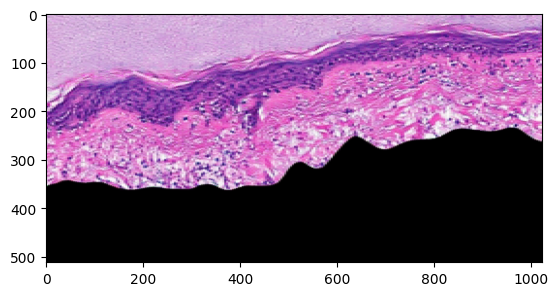

In [4]:
# Load OCT image
oct_image = cv2.imread(oct_input_image_path)
if oct_image is None:
  raise FileNotFoundError(f"The file '{oct_input_image_path}' was not found.")

# Cropping
cropped = crop(oct_image, target_width=1024, target_height=512, x0=x0, z0=z0)

# Run Inference
virtual_histology_image, masked_image , o2h_input = oct2hist.run_network(
    cropped,
    microns_per_pixel_x = microns_per_pixel_x,
    microns_per_pixel_z = microns_per_pixel_z,
    # min_signal_threshold = 0.15, # Un comment this part to skip the auto threshold discovery
    )

# Show the virtual histology image result
showImg(virtual_histology_image)

# Save virtual histology image to file
cv2.imwrite('/content/output.png', cv2.cvtColor(virtual_histology_image, cv2.COLOR_RGB2BGR));

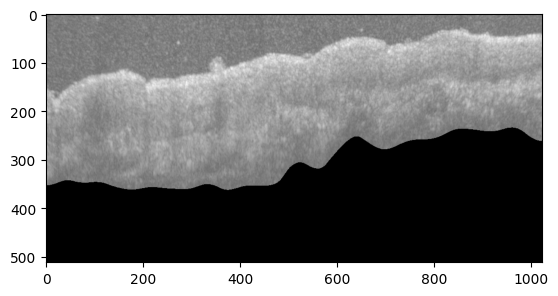

In [5]:
#@title Masked Image
showImg(masked_image)

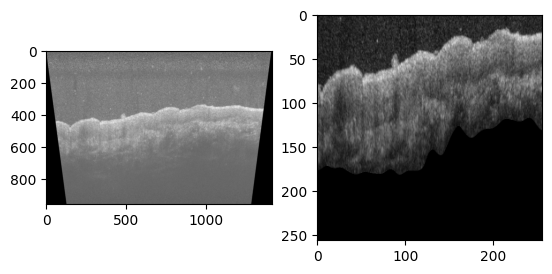

In [6]:
#@title Pre Processing Results (before - left, after preprocessing - right)
showTwoImgs(oct_image, o2h_input)

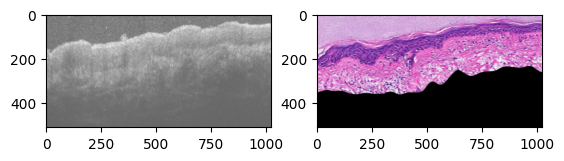

In [7]:
#@title Final Results
showTwoImgs(cropped, virtual_histology_image)